In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

#--------------------------------------------------
# Load MNIST Digits images
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#--------------------------------------------------
# Prepare data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
#--------------------------------------------------
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32")

In [2]:
test_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [3]:
#--------------------------------------------------
# Build two layer network
model = keras.Sequential([
layers.Dense(512, activation="relu"),
layers.Dense(10, activation="softmax")
])

#--------------------------------------------------
# Compile model
model.compile(optimizer="rmsprop",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

#--------------------------------------------------
# Fit model
model.fit(train_images, train_labels, epochs=5, batch_size=128)

2022-05-29 18:45:27.035122: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-29 18:45:27.162999: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-29 18:45:27.163340: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-29 18:45:27.165003: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the app

Epoch 1/5
469/469 [==============================] - 4s 3ms/step - loss: 0.2566 - accuracy: 0.9258
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1035 - accuracy: 0.9694
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0679 - accuracy: 0.9801
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0490 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0367 - accuracy: 0.9890


In [4]:
#--------------------------------------------------
# Test model 
test_digits = test_images[0:10]
predictions = model.predict(test_digits)

n=5
x = [predictions[i].argmax() for i in range(n)]
print(x)

[7, 2, 1, 0, 4]


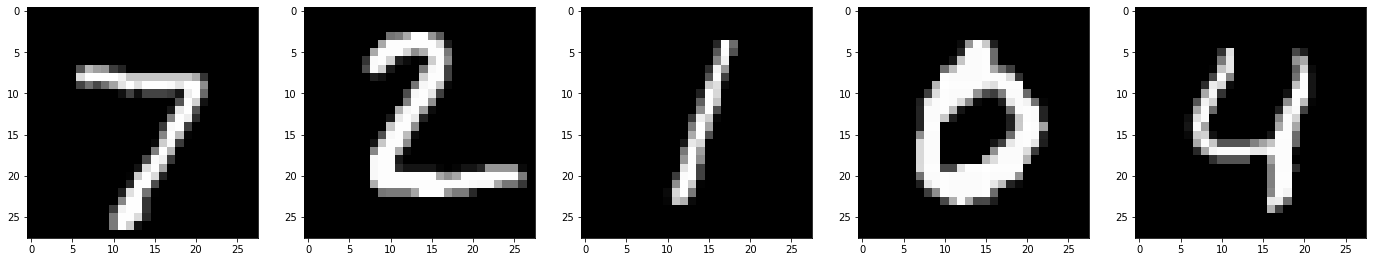

In [18]:
import matplotlib.pyplot as plt

x = [test_digits[i].reshape(28,28,1) for i in range(n)]

f, ax = plt.subplots(1,n,figsize=(24, 8))

for i in range(n):
    ax[i].imshow(x[i],cmap='gray', vmin=0, vmax=255)
plt.show()
plt.close(f)